In [5]:
#!/usr/bin/env python3

import numpy as np
# from line_profiler
from random import shuffle, randint
from heapq import heapify, heappush, heappop

from matplotlib import pyplot as plt

%matplotlib inline

(array([ 52.,  70.,  68.,  56.,  57.,  66.,  62.,  55.,  55.,  59.]),
 array([ 1000. ,  1399.7,  1799.4,  2199.1,  2598.8,  2998.5,  3398.2,
         3797.9,  4197.6,  4597.3,  4997. ]),
 <a list of 10 Patch objects>)

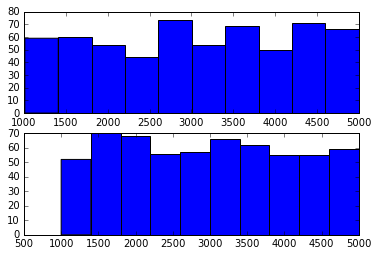

In [6]:
MIN_PRICE, MAX_PRICE = 1000, 5000
N_FLIGHTS, N_BEST = 600, 50

# generate data
# dep = list(range(N_FLIGHTS))
# shuffle(dep)
dep = [randint(MIN_PRICE, MAX_PRICE) for i in range(N_FLIGHTS)]
# arr = list(range(N_FLIGHTS))
# shuffle(arr)
arr = [randint(MIN_PRICE, MAX_PRICE) for i in range(N_FLIGHTS)]

plt.subplot(211)
plt.hist(dep)
plt.subplot(212)
plt.hist(arr)

In [7]:
# @profile
def sort(l):
    return sorted(l)


# @profile
def get_comb(dep, arr):
    return [(d, a) for d in dep for a in arr]


# @profile
def get_result(comb, n_best):
    return sorted((d + a, d, a) for d, a in comb)[:n_best]

dep_sorted = sort(dep)
arr_sorted = sort(arr)


In [7]:
comb = get_comb(dep_sorted, arr_sorted)
result = get_result(comb, N_BEST)

print(result)

[(2004, 1004, 1000), (2012, 1004, 1008), (2020, 1004, 1016), (2030, 1004, 1026), (2030, 1030, 1000), (2031, 1031, 1000), (2038, 1030, 1008), (2039, 1031, 1008), (2040, 1040, 1000), (2040, 1040, 1000), (2042, 1004, 1038), (2044, 1004, 1040), (2044, 1044, 1000), (2046, 1030, 1016), (2047, 1031, 1016), (2048, 1040, 1008), (2048, 1040, 1008), (2048, 1048, 1000), (2049, 1004, 1045), (2049, 1004, 1045), (2052, 1044, 1008), (2056, 1030, 1026), (2056, 1040, 1016), (2056, 1040, 1016), (2056, 1048, 1008), (2057, 1031, 1026), (2060, 1044, 1016), (2060, 1060, 1000), (2061, 1061, 1000), (2061, 1061, 1000), (2062, 1004, 1058), (2064, 1048, 1016), (2066, 1040, 1026), (2066, 1040, 1026), (2068, 1030, 1038), (2068, 1060, 1008), (2069, 1031, 1038), (2069, 1061, 1008), (2069, 1061, 1008), (2070, 1030, 1040), (2070, 1044, 1026), (2071, 1031, 1040), (2073, 1004, 1069), (2073, 1073, 1000), (2074, 1048, 1026), (2075, 1030, 1045), (2075, 1030, 1045), (2076, 1031, 1045), (2076, 1031, 1045), (2076, 1060, 1016)]

In [8]:
# @profile
def sort(l, n_elems=N_BEST):
#     return np.sort(l)[:n_elems]
    l = np.partition(l, n_elems)[:n_elems]
    return np.sort(l)
#     return np.partition(l, n_elems)

dep_sorted = sort(dep)
arr_sorted = sort(arr)

print(dep_sorted)
print(arr_sorted)

[1011 1025 1028 1030 1032 1038 1062 1065 1096 1102 1108 1127 1130 1132 1134
 1136 1137 1140 1143 1157 1160 1166 1172 1172 1176 1176 1185 1190 1198 1217
 1223 1229 1235 1249 1254 1279 1283 1290 1293 1297 1309 1316 1330 1331 1333
 1333 1335 1338 1346 1349]
[1000 1022 1026 1039 1046 1063 1069 1079 1085 1097 1114 1122 1124 1127 1137
 1139 1146 1151 1160 1168 1174 1178 1189 1197 1215 1232 1237 1238 1248 1251
 1252 1257 1268 1271 1276 1276 1276 1278 1281 1282 1283 1284 1286 1289 1300
 1314 1333 1344 1361 1377]


In [19]:
# get best combination using sorted lists and heap
heap = [(dep_sorted[0] + arr_sorted[0], 0, 0)]   # initial: best combination from dep and arr
visited = set()
result = []                                      # the result list
while len(result) < N_BEST:
    cost, i, j = heappop(heap)                   # get next-best combination
    if (i, j) in visited:
#         print(i, j)
        continue
    visited.add((i, j))
    result.append((cost, i, j))
    # add 'adjacent' combinations to the heap
    heappush(heap, (dep_sorted[i + 1] + arr_sorted[j], i + 1, j))
    heappush(heap, (dep_sorted[i] + arr_sorted[j + 1], i, j + 1))

print(result)

[(2011, 0, 0), (2025, 1, 0), (2028, 2, 0), (2030, 3, 0), (2032, 4, 0), (2033, 0, 1), (2037, 0, 2), (2038, 5, 0), (2047, 1, 1), (2050, 0, 3), (2050, 2, 1), (2051, 1, 2), (2052, 3, 1), (2054, 2, 2), (2054, 4, 1), (2056, 3, 2), (2057, 0, 4), (2058, 4, 2), (2060, 5, 1), (2062, 6, 0), (2064, 1, 3), (2064, 5, 2), (2065, 7, 0), (2067, 2, 3), (2069, 3, 3), (2071, 1, 4), (2071, 4, 3), (2074, 0, 5), (2074, 2, 4), (2076, 3, 4), (2077, 5, 3), (2078, 4, 4), (2080, 0, 6), (2084, 5, 4), (2084, 6, 1), (2087, 7, 1), (2088, 1, 5), (2088, 6, 2), (2090, 0, 7), (2091, 2, 5), (2091, 7, 2), (2093, 3, 5), (2094, 1, 6), (2095, 4, 5), (2096, 0, 8), (2096, 8, 0), (2097, 2, 6), (2099, 3, 6), (2101, 4, 6), (2101, 5, 5)]


In [ ]:
d = 0
a = 0
result = []
while len(result) < N_BEST:
    c = dep_sorted[d] + arr_sorted[a]
    result.append((c, d, a))
    c_d = dep_sorted[d + 1] + arr_sorted[a]
    c_a = dep_sorted[d] + arr_sorted[a + 1]
    if c_d < c_a:
        d++
        
    